## TP : Température — Système flou (scikit-fuzzy) AFIFI SAAD IID3

Ce TP a pour objectif de modéliser la **perception floue de la température** à l’aide de la bibliothèque `scikit-fuzzy`.

Nous allons définir trois ensembles flous représentant :
- **froid**
- **agréable**
- **chaud**

Ensuite, nous calculerons les **degrés d’appartenance** pour deux températures données :  
  18°C et 28°C.

Enfin, nous visualiserons les fonctions d’appartenance à l’aide d’un graphique.


In [41]:
%pip install scikit-fuzzy
%pip install networkx scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Étape 1 : Importation des bibliothèques

Nous allons importer :
- `numpy` pour gérer les tableaux de valeurs
- `scikit-fuzzy` (`skfuzzy`) pour créer les ensembles flous

In [42]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

## Étape 2 : Définir l’univers de discours

Nous considérons la **température** comme une variable continue comprise entre **0°C et 50°C**.

Nous allons créer un tableau `x_temp` contenant ces valeurs.

In [43]:
x_temp = np.arange(0, 51, 1)  # Températures de 0 à 50°C

## Étape 3 : Définir les ensembles flous

Nous allons créer trois ensembles flous :
- **froid** : triangulaire entre [10, 20]
- **agréable** : triangulaire centré autour de 25°C [15, 25, 30]
- **chaud** : triangulaire entre [27, 50]


In [44]:
# Fonctions d'appartenance
froid = fuzz.trimf(x_temp, [10, 10, 20])

# agréable : triangle [15,25,35]
agreable = fuzz.trimf(x_temp, [15, 25, 30])

# chaud : plateau unité entre 27 et 50
chaud = fuzz.trimf(x_temp, [27, 50, 50])

## Étape 4 : Visualiser les fonctions d’appartenance

Nous traçons les trois ensembles flous pour observer la répartition des zones de température.

c:\Users\Asus VivoBook F1605P\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\term.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


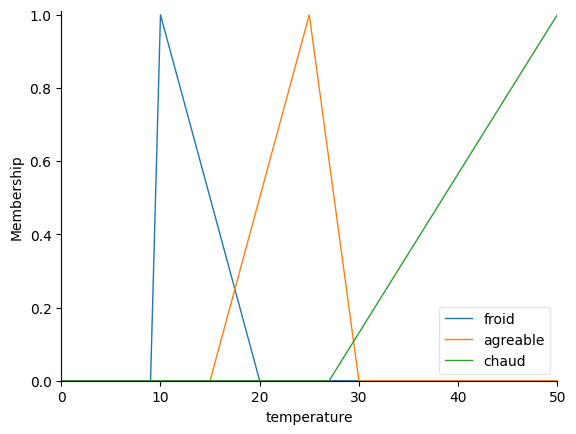

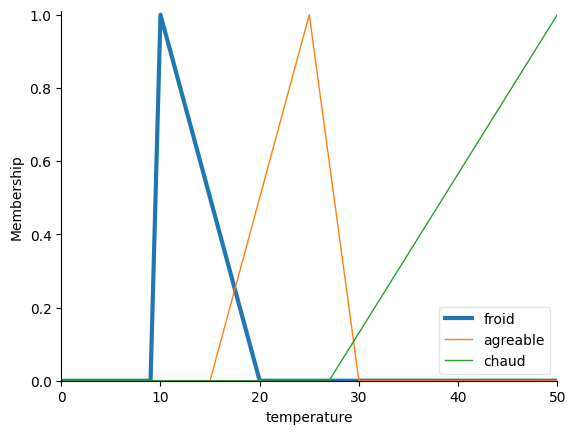

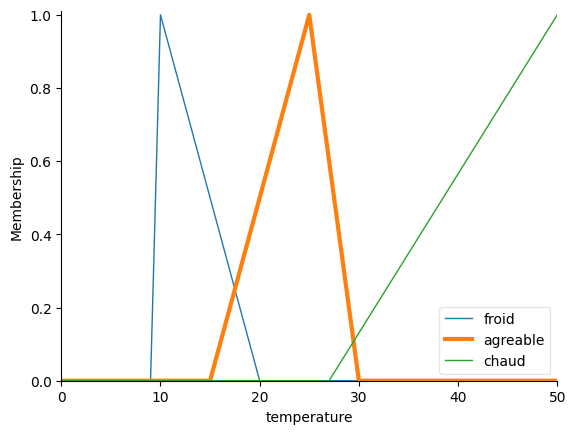

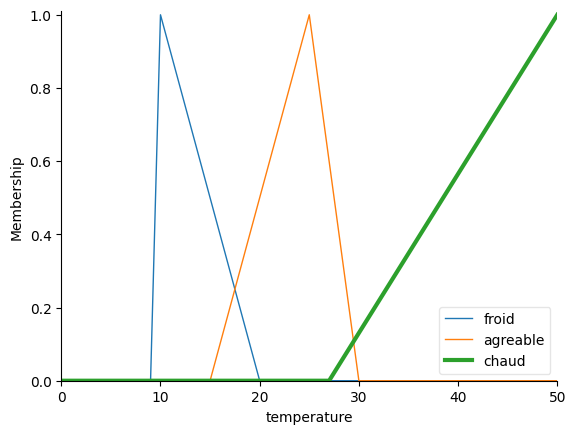

In [45]:
# create an Antecedent to attach the membership arrays (does not overwrite the existing arrays)
temperature = ctrl.Antecedent(x_temp, 'temperature')
temperature['froid'] = froid
temperature['agreable'] = agreable
temperature['chaud'] = chaud

# show combined plot and individual membership plots
temperature.view()
temperature['froid'].view()
temperature['agreable'].view()
temperature['chaud'].view()

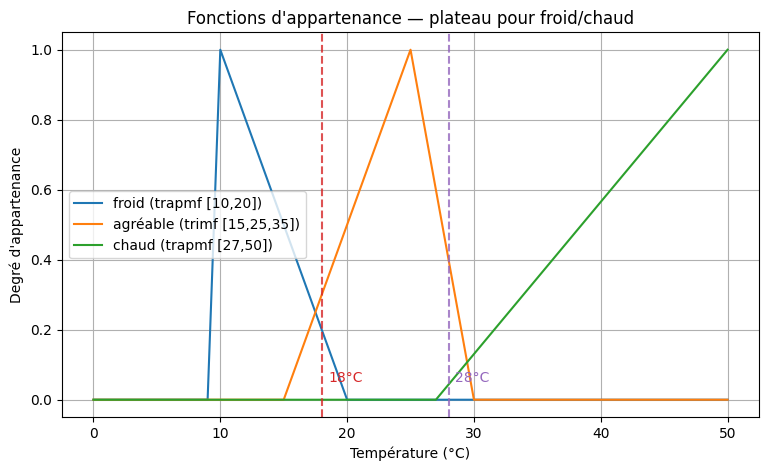

In [46]:
plt.figure(figsize=(9,5))
plt.plot(x_temp, froid, label='froid (trapmf [10,20])')
plt.plot(x_temp, agreable, label='agréable (trimf [15,25,35])')
plt.plot(x_temp, chaud, label='chaud (trapmf [27,50])')

# marquer 18°C et 28°C
for t, col in [(18, 'C3'), (28, 'C4')]:
    plt.axvline(t, color=col, linestyle='--', alpha=0.8)
    plt.text(t+0.5, 0.05, f'{t}°C', color=col)

plt.title("Fonctions d'appartenance — plateau pour froid/chaud")
plt.xlabel("Température (°C)")
plt.ylabel("Degré d'appartenance")
plt.legend()
plt.grid(True)
plt.show()

calcul des degrés d'appartenance pour 18°C et 28°C

In [47]:
def degree_of_membership(value):
    df = fuzz.interp_membership(x_temp, froid, value)
    da = fuzz.interp_membership(x_temp, agreable, value)
    dc = fuzz.interp_membership(x_temp, chaud, value)
    return df, da, dc

for val in [18, 28]:
    df, da, dc = degree_of_membership(val)
    print(f"Temp = {val}°C → froid: {df:.3f}, agréable: {da:.3f}, chaud: {dc:.3f}")

Temp = 18°C → froid: 0.200, agréable: 0.300, chaud: 0.000
Temp = 28°C → froid: 0.000, agréable: 0.400, chaud: 0.043


# Prédiction de la vitesse à partir de la température

Objectif :
- Utiliser **une seule entrée** : température.
- Définir des fonctions d'appartenance pour `température` et `vitesse`.
- Construire des règles floues simples (température → vitesse).
- Simuler pour **température = 17°C** et afficher la vitesse calculée.


In [48]:
vitesse = ctrl.Consequent(np.arange(0, 101, 1), 'vitesse') 

In [49]:
# Vitesse : trimf avec chevauchements pour transitions douces
vitesse['faible']  = fuzz.trimf(vitesse.universe, [0, 10, 40])
vitesse['moyenne'] = fuzz.trimf(vitesse.universe, [40, 50, 60])
vitesse['haute']   = fuzz.trimf(vitesse.universe, [60, 80, 100])

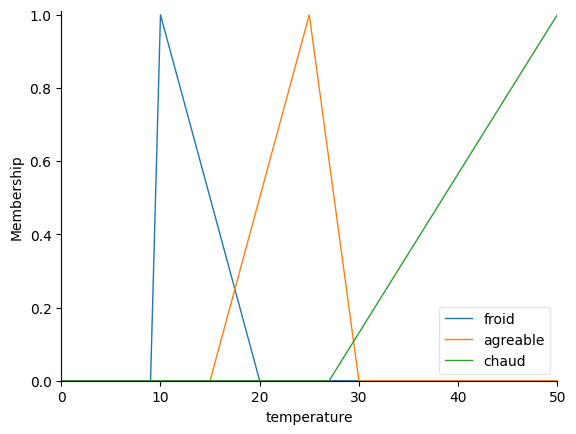

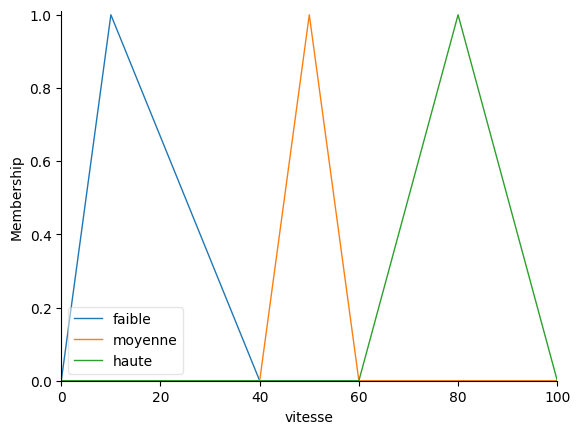

In [50]:
temperature.view()
vitesse.view()
plt.show()

## Règles floues

Nous utilisons des règles simples (exemples pédagogiques) :
- SI température EST froid ALORS vitesse EST faible
- SI température EST agréable ALORS vitesse EST moyenne
- SI température EST chaud ALORS vitesse EST haute

In [51]:
r1 = ctrl.Rule(temperature['froid'], vitesse['faible'])
r2 = ctrl.Rule(temperature['agreable'], vitesse['moyenne'])
r3 = ctrl.Rule(temperature['chaud'], vitesse['haute'])

vitesse_ctrl = ctrl.ControlSystem([r1, r2, r3])

In [52]:
sim = ctrl.ControlSystemSimulation(vitesse_ctrl)

# Entrée demandée
sim.input['temperature'] = 17

# Calcul
sim.compute()

v_calc = sim.output['vitesse']
print(f"Pour temperature = 17°C → vitesse calculée (défuzzifiée) = {v_calc:.2f} km/h")

Pour temperature = 17°C → vitesse calculée (défuzzifiée) = 26.78 km/h


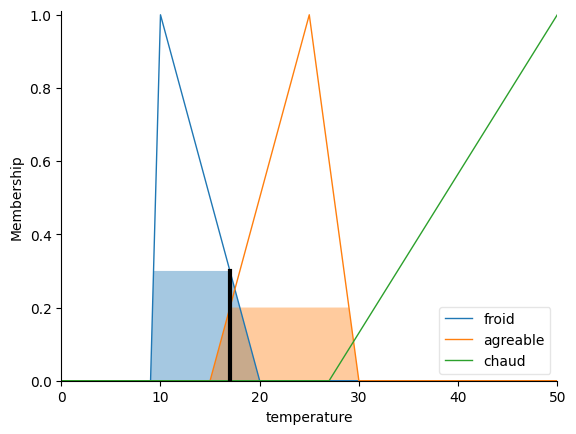

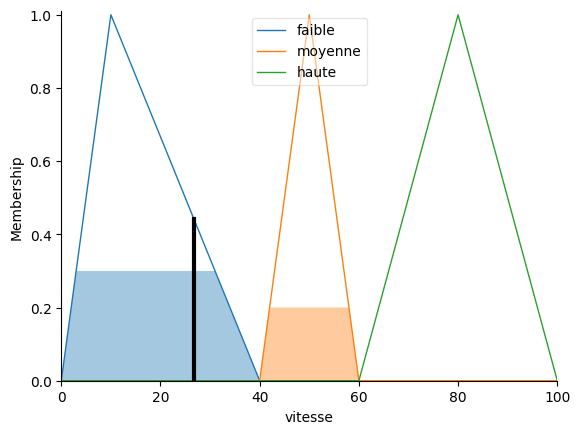

In [53]:
# Montrer la position de la température sur les MFs et la sortie résultante
temperature.view(sim=sim)
vitesse.view(sim=sim)
plt.show()